# Brain Age Prediction KernelRidge

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.kernel_ridge import KernelRidge
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class KernelRidgeRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="KernelRidge"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = KernelRidge
        if params is None:
            self.params = {
                'alpha': 1.0,
                'kernel': 'linear',
                'gamma': None
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(1e-3, 10.0, prior='log-uniform'),
                'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
                'gamma': Real(1e-5, 1e-1, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = KernelRidgeRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'Tan'
nameset = 'KernelRidge'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [9]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

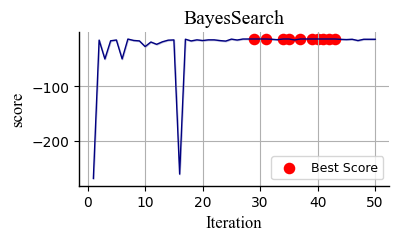

Top 1: Iteration 43, Score -13.512345223174737
Top 2: Iteration 40, Score -13.51248995506893
Top 3: Iteration 42, Score -13.512612658491724
Top 4: Iteration 39, Score -13.512662644824115
Top 5: Iteration 37, Score -13.513508323685993
Top 6: Iteration 31, Score -13.514214968869293
Top 7: Iteration 35, Score -13.514765296054216
Top 8: Iteration 29, Score -13.517542529999835
Top 9: Iteration 41, Score -13.520508060997992
Top 10: Iteration 34, Score -13.520739259392286


In [10]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [11]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.32361209480849945,
  'gamma': 0.007606327802624389,
  'kernel': 'rbf'},
 {'alpha': 0.3342972423734259, 'gamma': 0.007051784087757954, 'kernel': 'rbf'},
 {'alpha': 0.3288114486544325, 'gamma': 0.0076892146430976, 'kernel': 'rbf'},
 {'alpha': 0.33046742475192376,
  'gamma': 0.007700266973333912,
  'kernel': 'rbf'},
 {'alpha': 0.3439050477834459, 'gamma': 0.007969398633738802, 'kernel': 'rbf'},
 {'alpha': 0.36041894134529373,
  'gamma': 0.008002548096977367,
  'kernel': 'rbf'},
 {'alpha': 0.3776468589428537, 'gamma': 0.007774317611093703, 'kernel': 'rbf'},
 {'alpha': 0.36796833130419665, 'gamma': 0.00874383912296886, 'kernel': 'rbf'},
 {'alpha': 0.3651101166916283,
  'gamma': 0.0065996330846718335,
  'kernel': 'rbf'},
 {'alpha': 0.42084665246304287,
  'gamma': 0.008839416472449273,
  'kernel': 'rbf'}]

In [12]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [16]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [18]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     734.3
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          5.93e-129
Time:                        00:17:17   Log-Likelihood:                -5044.5
No. Observations:                1323   AIC:                         1.009e+04
Df Residuals:                    1321   BIC:                         1.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2760      0.761     37.150      0.0

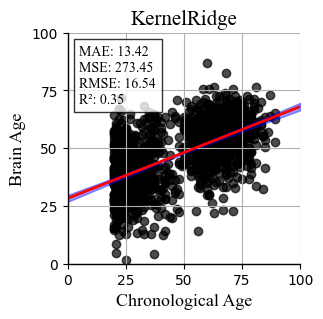

Error medio absoluto: 13.423368631968108
Error cuadrático medio: 273.45106039403123
Raíz del error cuadrático medio: 16.536355716844966
Coeficiente de determinación (R²): 0.3522902504969495


In [19]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [7]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [8]:
shap_summary_sorted_CN

[('Low_subj_spec_RPD_CING_right', 3057.793255744831),
 ('Low_subj_spec_EPP_CING_left', 2798.071732813576),
 ('IAF_OCC_right', 2502.6450073887136),
 ('Low_subj_spec_RPD_OCC_left', 2137.8195814154315),
 ('Low_subj_spec_EPP_OCC_right', 2135.4859327538975),
 ('High_subj_spec_EPP_CING_right', 2006.9981035686214),
 ('High_subj_spec_RPD_CING_right', 2006.7072507263267),
 ('TF_MFG_right', 1980.8604443318434),
 ('IAF_OCC_left', 1698.5361105035397),
 ('Alpha2_canon_RPD_CING_right', 1606.8343865833315),
 ('IAF_INS_right', 1438.525071109108),
 ('Low_subj_spec_EPP_HPC_right', 1362.857907371655),
 ('TF_INS_left', 1289.3238297556898),
 ('Low_subj_spec_EPP_PARIET_left', 1280.461708142155),
 ('Low_subj_spec_EPP_PARIET_right', 1212.4948225346443),
 ('High_subj_spec_RPD_HPC_right', 1208.1366992643698),
 ('High_subj_spec_EPP_HPC_right', 1208.0001704191145),
 ('IAF_ORB_left', 1177.4233144482664),
 ('Low_subj_spec_RPD_PARIET_left', 1108.2690374926956),
 ('Alpha2_canon_EPP_OCC_left', 1079.0078232082692),
 ('

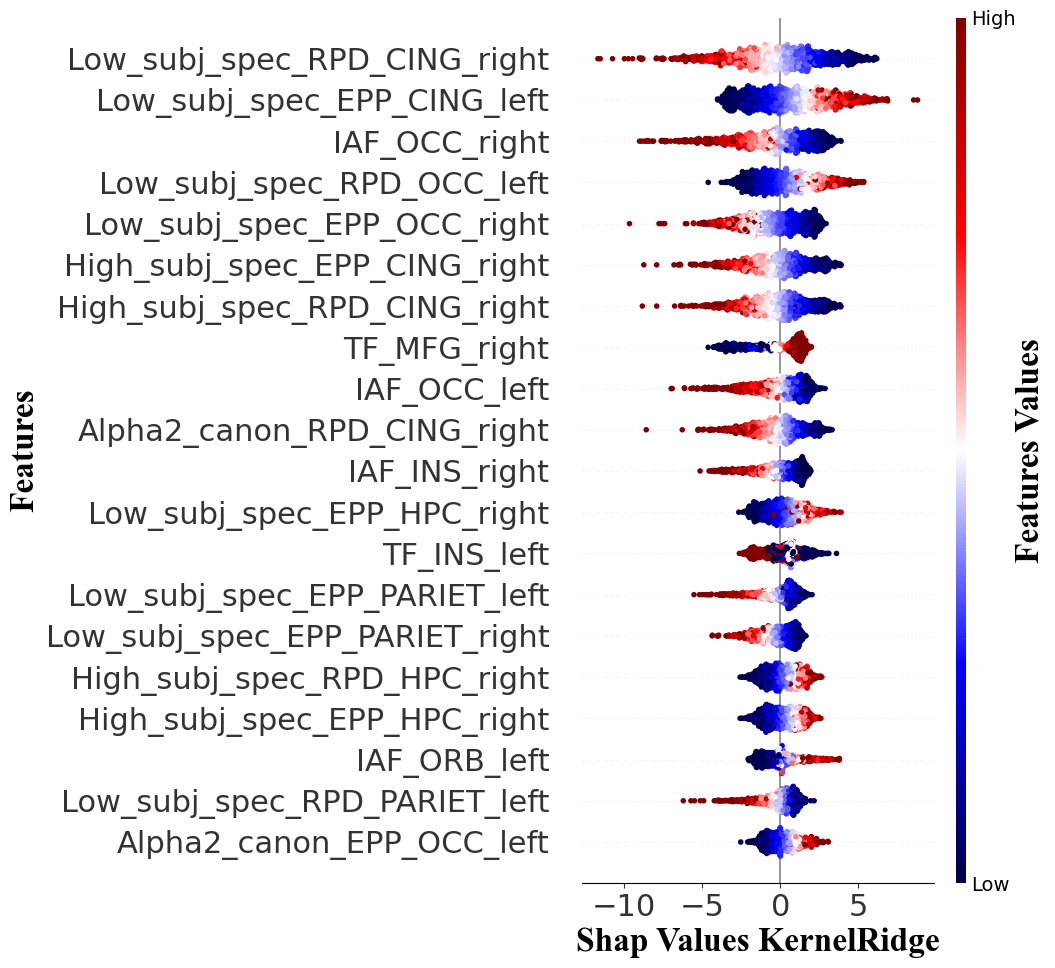

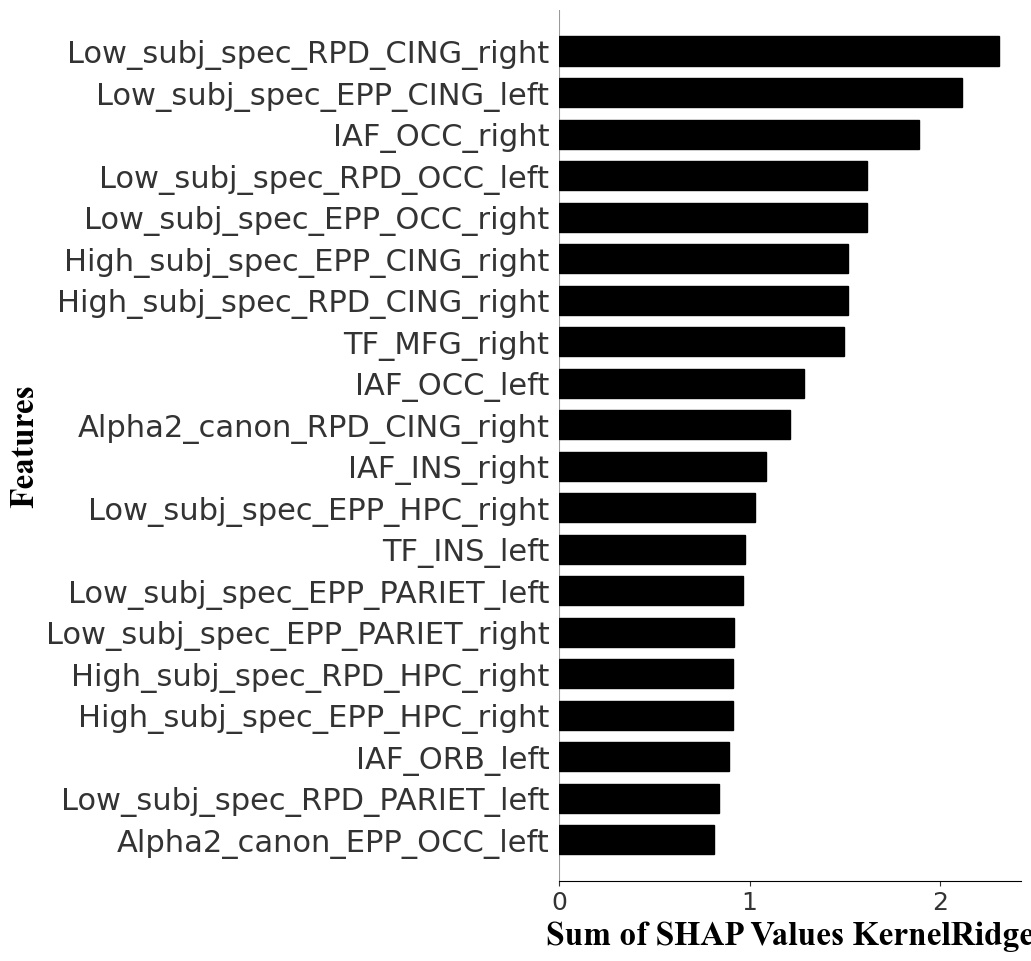

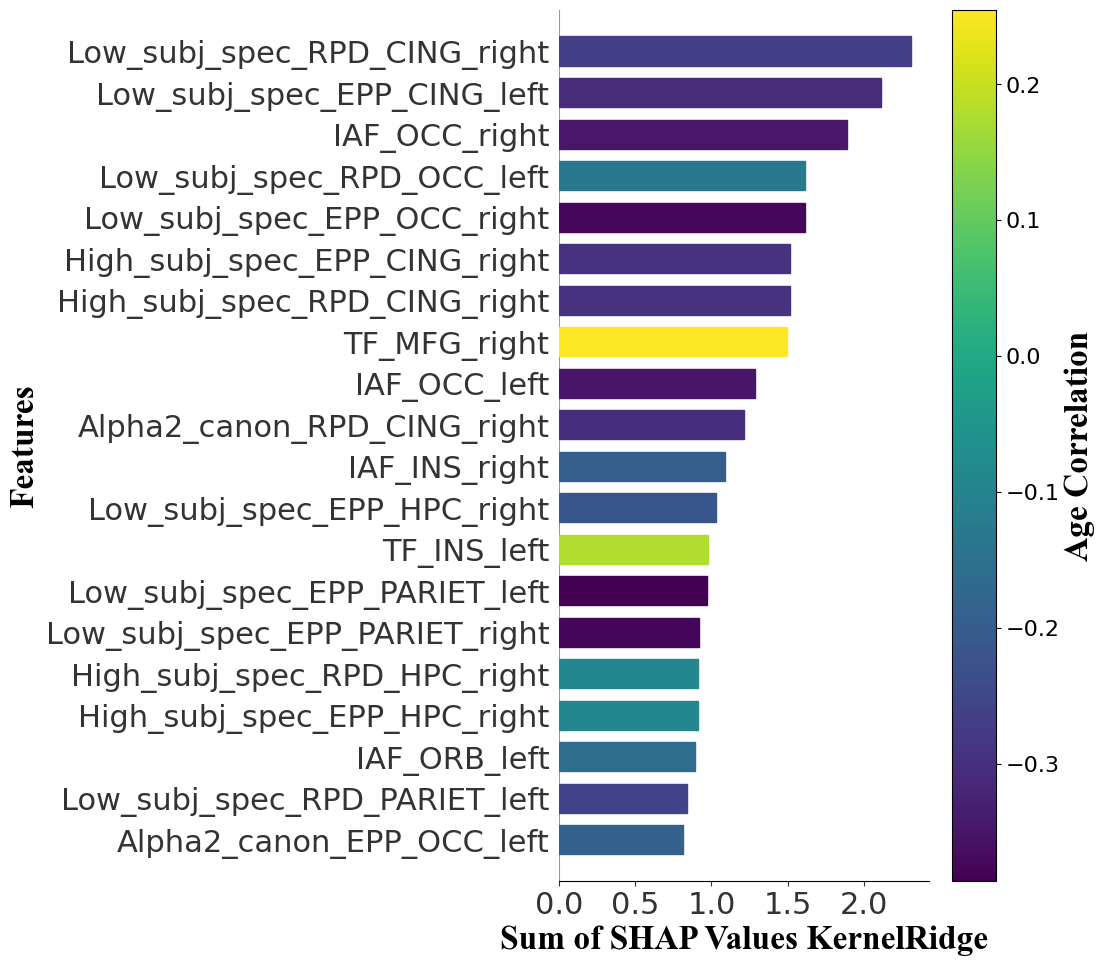

In [22]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [9]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

CING_right: 1.000000
OCC_right: 0.534450
OCC_left: 0.442061
CING_left: 0.322420
MFG_right: 0.228254


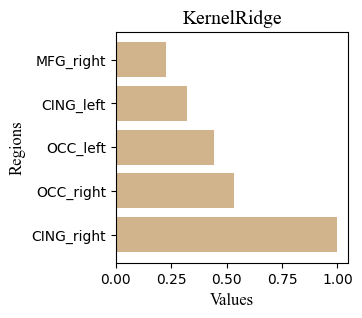

In [10]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


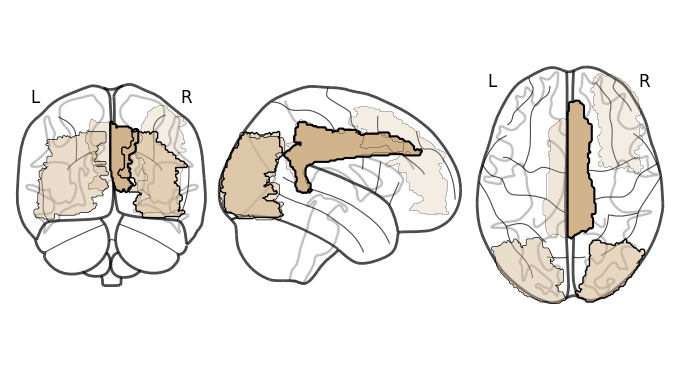

In [11]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)